# Assignment 2
### CHEM ENG/ SEP 786
### Mohammad Kashif Siddiqui - 0755452


### Headers

In [349]:
import numpy as np
import matplotlib.pyplot as plt
import os 
import pandas as pd
from IPython.display import Image
from sklearn.metrics import mean_squared_error
import math
import random as rn
import sklearn.discriminant_analysis
from sklearn import datasets

### Checking paths

In [2]:
print('test1')
dir_path = os.getcwd()
print(dir_path)

test1
C:\Users\User\AppData\Roaming\Python\Python35\Scripts\Allwork\SEP_788


# Question 1
#### Generate two  sets  of 10  dimensional (10  attribute  data),  one  for  each  class.  You  can  use  any covariance  matrix  you  would  like,  however,  the  matrix  should  contain  covariance  between  at least  3 of  the  attributes.  Similarly,you  can use  any  class  means  you  would  like.  However, you must be sure that when using a linear classifier (as we will do herein), you will have some errors when  classifying  the  training  data (i.e.  ensure  that  the distance  between the  means is  small enough AND the variance is large enough so that the classes overlap somewhat.


### Creating Dataset 1

##### Instead of sharing it in between 3 attributes, I made a random cov matrix that's shared between all of them for simplicity, albeit it may make PCA harder in the future.
##### The mean is also randomly generated for all the attributes, so that my own personal biases don't impact the possiblity of data being of a certain distribution.
##### I made the N value high so that the learning algorithm has more data to work with.

In [520]:
ran_cov1 = [[1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 3, 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 4, 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 12, 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 7., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 2., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 7, 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 9, 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 10, 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 5.]]

In [521]:
np.random.seed(89)
N = 1000
ran_mean = np.random.randint(low=-5, high=5, size=10)
ran_cov = sklearn.datasets.make_spd_matrix(10, random_state=89) #change random seed here too.
#ran_cov1 = sklearn.datasets.make_sparse_spd_matrix(dim=10, alpha=0.99, norm_diag=False, smallest_coef=0.05, largest_coef=0.95, random_state=9)

data_1 = np.random.multivariate_normal(ran_mean, ran_cov1, N)
#data_1a = data_1 - np.mean(data_1)
data_test = np.random.multivariate_normal(ran_mean, ran_cov1, 10)

In [522]:
ran_mean

array([-2, -1,  1,  0,  3, -3, -4,  2,  3, -5])

In [525]:
type(data_1)

numpy.ndarray

### Creating Dataset 2

##### Same setup as before, different random seeds. Difference between means from the two datasets is very close for a few variables. All I did was flip the random seed backwards.

In [526]:
ran_cov2 = [[12., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 4, 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 3, 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 8, 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 7., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 9., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 11, 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 6, 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 3, 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 10.]]

In [527]:
np.random.seed(98)
N = 1000
ran_mean = np.random.randint(low=-5, high=5, size=10)
ran_cov = sklearn.datasets.make_spd_matrix(10, random_state=98) #change random seed here too.
#ran_cov1 = sklearn.datasets.make_sparse_spd_matrix(dim=4, alpha=0.2 norm_diag=False, smallest_coef=0.05, largest_coef=0.95, random_state=98)


data_2 = np.random.multivariate_normal(ran_mean, ran_cov2, N)
#data_2a = data_2 - np.mean(data_2)
data2_test = np.random.multivariate_normal(ran_mean, ran_cov2, 10)

In [528]:
ran_mean

array([-1,  4, -4, -1,  2,  1,  4, -3,  2, -3])

### Visually Checking Data

##### Just plottting the two classes against one another for each attribute to see how the distribution looks, paying attention to the ranges in values and shape of points to see if there are obvious realationships between the classes. I didn't feel the need to change the underlying data distribution after seeing this, as it seemed quite appropriate

<Figure size 432x288 with 0 Axes>

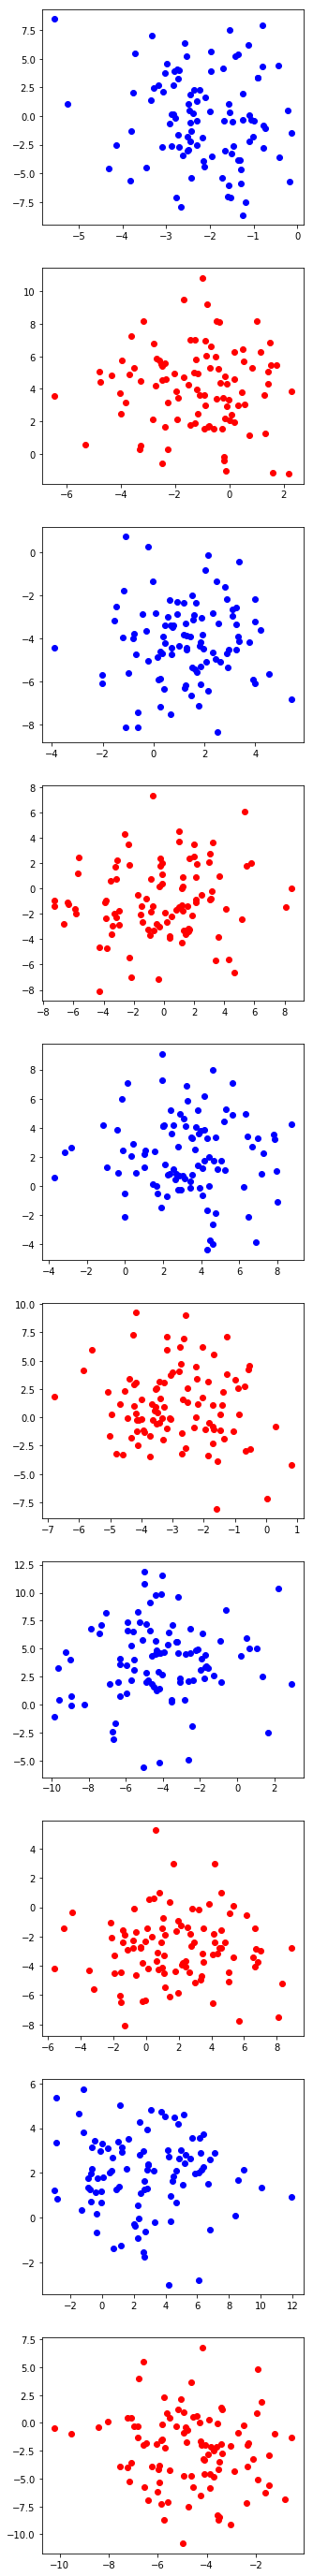

In [529]:
plt.figure()
fig, ax =plt.subplots(10, figsize=(5,50))

ax[0].scatter(data_1[1:100,0], data_2[1:100,0],  c='blue')   
ax[1].scatter(data_1[1:100,1], data_2[1:100,1],  c='red')    

ax[2].scatter(data_1[1:100,2], data_2[1:100,2],  c='blue')    
ax[3].scatter(data_1[1:100,3], data_2[1:100,3],  c='red')    

ax[4].scatter(data_1[1:100,4], data_2[1:100,4],  c='blue')    
ax[5].scatter(data_1[1:100,5], data_2[1:100,5],  c='red')    

ax[6].scatter(data_1[1:100,6], data_2[1:100,6],  c='blue')    
ax[7].scatter(data_1[1:100,7], data_2[1:100,7],  c='red')    

ax[8].scatter(data_1[1:100,8], data_2[1:100,8],  c='blue')    
ax[9].scatter(data_1[1:100,9], data_2[1:100,9],  c='red')    

plt.show()

### Combined Datasets

In [33]:
#comb_c1 = np.concatenate((data_1a,data_2a))

#Set for Q2.
comb2 = np.concatenate((data_1,data_2))
mean2 = np.mean(comb2)
comb_c2 = comb2 - mean2

# set for testing Q2/3
comb_test = np.concatenate((data2_test,data_test))
mean3 = np.mean(comb_test)
comb2_test = comb_test - mean3

#labels for Q2, goes with comb_c2
clas = np.zeros(1000)
clas = np.concatenate((clas, np.ones(1000)))

#labels for comb2_test, for Q2/3
labels = np.ones(10)
labels = np.concatenate((labels, np.zeros(10)))


In [531]:
comb2_test

array([[-3.89324256e+00,  6.31005892e+00, -3.80383065e+00,
        -1.35842349e-01,  5.01130016e+00,  3.63393726e+00,
         6.17727759e+00,  2.46839896e+00,  2.62072315e+00,
        -2.79284629e+00],
       [-5.09184120e-01,  3.07467136e+00, -2.86788764e+00,
         2.89653230e-01,  3.41722750e-01, -2.22079113e+00,
         2.41359154e+00, -1.71422600e+00,  2.59939231e+00,
        -3.62238184e-02],
       [-2.34483930e+00, -5.96425435e-01, -3.97788189e+00,
         2.10506532e+00, -2.89959795e+00,  1.01859153e+00,
         5.29243892e+00, -6.72234173e+00,  3.26470805e+00,
        -6.16502843e+00],
       [ 1.25923153e+00,  5.75671772e+00, -3.18511612e+00,
         2.49935573e+00,  1.45854671e+00,  4.01707985e+00,
         8.60317199e+00, -4.81975451e+00,  3.09969095e-01,
        -2.68733773e+00],
       [-2.62623248e+00,  2.63186819e+00, -5.47095872e+00,
         6.26734218e-01,  4.10311446e+00, -1.31485219e+00,
         9.98786299e+00,  9.51739290e-03,  4.77220205e+00,
         1.

In [532]:
comb_c2

array([[-1.81844616, -5.60576375,  0.68092932, ...,  1.41723287,
        -1.22489785, -6.29951804],
       [-1.1225885 , -1.42716747,  3.49064593, ..., -0.50112065,
         2.57533532, -5.25085845],
       [-1.16778313, -0.62758088,  0.04533039, ...,  6.91365088,
         4.68215187, -4.3750166 ],
       ...,
       [-3.24713046,  6.84781873, -4.88375385, ..., -3.44733072,
         2.84221949,  2.3173966 ],
       [-2.11748004,  6.21393561, -3.82035304, ...,  1.18540684,
         1.41121676, -2.45960718],
       [-5.88070731,  2.81996317, -6.7658234 , ..., -3.54966631,
         2.40242151, -4.03694567]])

In [533]:
#np.array_equal(comb_c1, comb_c2)
np.allclose(comb_c1, comb_c2)

False

# Question 2

##### Take the ENTIRE  dataset (both classes) and use PCA to represent  the data in score space. With the PCA representation, do the following:

##### a. Reduce  the  dimensionality to  10,  9,  8,  7,  6  and 5 by incrementally  removing  the direction  in  the  data  corresponding  to  the  smallest  variance and,  from  the resulting scores,  reconstruct  the  original  10-dimensional  data  (in  other  words,  apply  the  PCA formula  backwards). Determine  the  mean  square  error  between  the  reconstructed dataset  and  the  original  data  and  plot  the  result for  10,  9,  8,  7,  6  and  5  retained dimensions.

##### b. Follow the same dimensionality reduction procedure as part (a) except classify all of the data in the dataset using the PCA scores with FLD and determine the classification error instead of determining the reconstruction MSE.Plot the classification error result (total for both classes) for the 10, 9, 8, 7, 6 and 5 retained dimensions

### PCA

In [534]:
D,E = numpy.linalg.eig(numpy.dot(comb_c2.T,comb_c2))
print('D:', D)
print('E', E)
sortIndex = numpy.argsort(D)
print('sortIndex: ', sortIndex)

D: [95115.26604273 84418.88163374 19279.62515276  7398.07575912
 16646.42461115 10129.87024021 14478.94419616 13494.40021727
 13157.3882122  12287.58332049]
E [[-0.06557447 -0.22235693  0.07553083 -0.00430131 -0.12813455  0.07157353
   0.48609911  0.40213096 -0.72036621  0.04542693]
 [-0.37936208  0.25279322  0.028305   -0.66944739 -0.133209    0.44249408
   0.02928538  0.04093034  0.09540323  0.34356756]
 [ 0.37423034 -0.18672354 -0.02605195 -0.74107783  0.14394941 -0.41120437
  -0.00848679 -0.02930144 -0.08088474 -0.279155  ]
 [ 0.08855619 -0.01161855  0.98795651 -0.00149063 -0.02614652  0.04592111
  -0.05118262 -0.09391623  0.0190383  -0.03698318]
 [ 0.05582414  0.4686767   0.03679778  0.0160779   0.26011294 -0.09711259
  -0.58877952  0.49829966 -0.31788168  0.05010993]
 [-0.29760368 -0.12612737  0.08695461  0.00665337 -0.16968569 -0.70867021
   0.01175833  0.16121393  0.16749714  0.55020758]
 [-0.67045923  0.01559926  0.06848307 -0.00972498  0.61367753 -0.15110608
   0.14674609 -0.

### Making the initial PCA coefficient output

In [535]:
newE = numpy.zeros((10,10))
index = 0
for i in range(0,10):
    newE[:,index] = E[:,sortIndex[i]]
    index = index + 1
    
PCA = numpy.dot(comb_c2,newE)

print('PCA: ')
print(PCA)
print('PCA Shape: ', PCA.shape)

print('newE: ')
print(newE)

PCA: 
[[  3.56317101  -2.40753113  -3.57109145 ...  -2.84315341   5.65796916
    5.86247554]
 [ -1.34152222  -3.74908015  -0.59464448 ...   2.99363002   5.95399288
    6.05100229]
 [  0.89361137   2.53459837   1.27564287 ...   1.88349624   7.87399704
    7.44033815]
 ...
 [ -1.03412478  -0.21934572   3.82314385 ...   1.93226655   5.10255194
  -10.24140498]
 [ -1.16101348   4.43882249   3.01683693 ...   0.44214356   6.01767479
   -1.79718283]
 [  3.11558698  -2.51009882  -0.14649797 ...   5.83105436   6.67801776
  -10.49664507]]
PCA Shape:  (2000, 10)
newE: 
[[-0.00430131  0.07157353  0.04542693 -0.72036621  0.40213096  0.48609911
  -0.12813455  0.07553083 -0.22235693 -0.06557447]
 [-0.66944739  0.44249408  0.34356756  0.09540323  0.04093034  0.02928538
  -0.133209    0.028305    0.25279322 -0.37936208]
 [-0.74107783 -0.41120437 -0.279155   -0.08088474 -0.02930144 -0.00848679
   0.14394941 -0.02605195 -0.18672354  0.37423034]
 [-0.00149063  0.04592111 -0.03698318  0.0190383  -0.09391623

### Setting up the reduced Eigenvectors (loadings) 

In [566]:
# Reducing to 9
newE_9 = np.delete(newE, 0, axis=1)
# Reducting to 8
newE_8 = np.delete(newE_9, 0, axis=1)
# Reducting to 7
newE_7 = np.delete(newE_8, 0, axis=1)
# Reducting to 6
newE_6 = np.delete(newE_7, 0, axis=1)
# Reducting to 5
newE_5 = np.delete(newE_6, 0, axis=1)

In [565]:
newE_9

array([[ 0.07157353,  0.04542693, -0.72036621,  0.40213096,  0.48609911,
        -0.12813455,  0.07553083, -0.22235693, -0.06557447],
       [ 0.44249408,  0.34356756,  0.09540323,  0.04093034,  0.02928538,
        -0.133209  ,  0.028305  ,  0.25279322, -0.37936208],
       [-0.41120437, -0.279155  , -0.08088474, -0.02930144, -0.00848679,
         0.14394941, -0.02605195, -0.18672354,  0.37423034],
       [ 0.04592111, -0.03698318,  0.0190383 , -0.09391623, -0.05118262,
        -0.02614652,  0.98795651, -0.01161855,  0.08855619],
       [-0.09711259,  0.05010993, -0.31788168,  0.49829966, -0.58877952,
         0.26011294,  0.03679778,  0.4686767 ,  0.05582414],
       [-0.70867021,  0.55020758,  0.16749714,  0.16121393,  0.01175833,
        -0.16968569,  0.08695461, -0.12612737, -0.29760368],
       [-0.15110608, -0.32867519, -0.04868503, -0.11870714,  0.14674609,
         0.61367753,  0.06848307,  0.01559926, -0.67045923],
       [ 0.13326979,  0.52848064,  0.11673098,  0.02498839,  0

### Setting up the reconstruction using the formula below:
##### X_reconstructed = X_centered . (Eigenvector . (Eigenvector^T)) + np.mean(X_original)

##### Ex:  comb_c2_rec = comb_c2 . (newE_9 . (newE_9^T)) + mean2

In [538]:
temp_9 = np.dot(newE_9, newE_9.T)
temp_8 = np.dot(newE_8, newE_8.T)
temp_7 = np.dot(newE_7, newE_7.T)
temp_6 = np.dot(newE_6, newE_6.T)
temp_5 = np.dot(newE_5, newE_5.T)

#print(temp_9.shape)

# reconstructed original data
recon_9 = np.dot(comb_c2, temp_9) + mean2
recon_8 = np.dot(comb_c2, temp_8) + mean2
recon_7 = np.dot(comb_c2, temp_7) + mean2
recon_6 = np.dot(comb_c2, temp_6) + mean2
recon_5 = np.dot(comb_c2, temp_5) + mean2

print(recon_5.shape)

(2000, 10)


### 2a. Mean Squared Error For All Reconstructions

In [539]:
# 10
MSE_10 = mean_squared_error(comb_c2, comb_c2)
# 9
MSE_9 = mean_squared_error(comb_c2, recon_9)
# 8
MSE_8 = mean_squared_error(comb_c2, recon_8)
# 7
MSE_7 = mean_squared_error(comb_c2, recon_7)
# 6
MSE_6 = mean_squared_error(comb_c2, recon_6)
# 5
MSE_5 = mean_squared_error(comb_c2, recon_5)

In [540]:
print('MSE for 10: ', MSE_10 , '(NO RECONSTRUCTION)')
print('MSE for 9: ', MSE_9)
print('MSE for 8: ', MSE_8)
print('MSE for 7: ', MSE_7)
print('MSE for 6: ', MSE_6)
print('MSE for 5: ', MSE_5)

MSE for 10:  0.0 (NO RECONSTRUCTION)
MSE for 9:  0.43065268523170425
MSE for 8:  0.9319933130158736
MSE for 7:  1.5538199291012387
MSE for 6:  2.2175350627271015
MSE for 5:  2.8923701478671977


#### When the MSE is calculated with "ran_cov" from the datasets above, the MSE for even set with 5 removed dimensions is ~0.24, ie. with arbitrarily increasing the variance, the MSE becomes arbitrarily high, I have tried out a variety of random variances in the diagonal for 'ran_cov1', but none of the values give a low MSE.

### 2b. Setting up for classification 

In [541]:
def FLD(input1, label):
    # training set result without feature selection
    lda = sklearn.discriminant_analysis.LinearDiscriminantAnalysis()
    #training
    lda.fit(input1,label)
    #testing
    prediction = lda.predict(input1)
    error = sum(abs(prediction - label))
    print("total error with all features = ", error)
    #print(error.dtype)
    
    

### Testing PCA - 10, 9, 8, 7, 6, 5 reconstructd data to classify and check for error

In [542]:
# 10
C_E_10 = FLD(comb_c2, clas)
# 9
C_E_9 = FLD(recon_9, clas)
# 8
C_E_8 = FLD(recon_8, clas)
# 7
C_E_7 = FLD(recon_7, clas)
# 6
C_E_6 = FLD(recon_6, clas)
# 5
C_E_5 = FLD(recon_5, clas)

total error with all features =  9.0
float64
total error with all features =  9.0
float64
total error with all features =  9.0
float64
total error with all features =  17.0
float64
total error with all features =  19.0
float64
total error with all features =  19.0
float64


### Testing the total Error

In [543]:
testing = FLD(comb2_test, labels)

total error with all features =  0.0
float64


### Plotting the Total Error

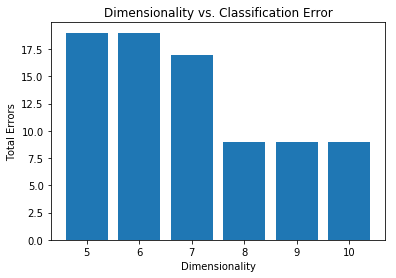

In [559]:
plt.figure()
plt.bar([10,9,8,7,6,5], [9.0, 9.0, 9.0, 17.0, 19.0, 19.0], width=0.8)
plt.xlabel("Dimensionality")
plt.ylabel("Total Errors")
plt.title('Dimensionality vs. Classification Error')
plt.show()

# Question 3

##### Reduce the dimensionality of the original dataset using a backwardsearchto 10, 9, 8, 7, 6and 5(by  minimizing  the  error)and  classify allof  the  data  in  the  dataset   using  the  reduced dimensional data withFLD. Plot the classification error result (total for both classes) for the 10, 9, 8, 7, 6 and 5 retained dimensions

In [567]:
def PCA_def(new_E, number, comb_c2):
    #new_E = numpy.zeros((10,number))
    #index = 0
    #for i in range(0,number):
    #    new_E[:,index] = E[:,sortIndex[i]]
    #    index = index + 1
    
    PCA_10 = numpy.dot(comb_c2,new_E)
    
    return PCA_10

In [568]:
# PCA coefficient matrices

PCA_10 = PCA_def(newE, 10, comb_c2)
PCA_9 = PCA_def(newE_9, 9, comb_c2)
PCA_8 = PCA_def(newE_8, 8, comb_c2)
PCA_7 = PCA_def(newE_7, 7, comb_c2)
PCA_6 = PCA_def(newE_6, 6, comb_c2)
PCA_5 = PCA_def(newE_5, 5, comb_c2)

In [569]:
#Classification test with the reduced PCA set

# 10
Y_10 = FLD(PCA_10, clas)
# 9
Y_9 = FLD(PCA_9, clas)
# 8
Y_8 = FLD(PCA_8, clas)
# 7
Y_7 = FLD(PCA_7, clas)
# 6
Y_6 = FLD(PCA_6, clas)
# 5
Y_5 = FLD(PCA_5, clas)

total error with all features =  9.0
float64
total error with all features =  9.0
float64
total error with all features =  9.0
float64
total error with all features =  17.0
float64
total error with all features =  19.0
float64
total error with all features =  19.0
float64


### Plotting the Total Error

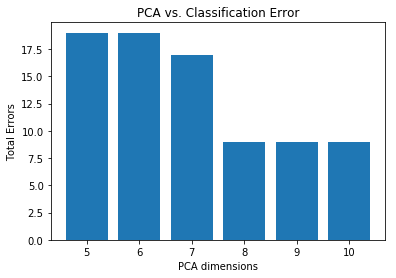

In [571]:
plt.figure()
plt.bar([10,9,8,7,6,5], [9.0, 9.0, 9.0, 17.0, 19.0, 19.0], width=0.8)
plt.xlabel("PCA dimensions")
plt.ylabel("Total Errors")
plt.title('PCA vs. Classification Error')
plt.show()

# Question 4

##### Qualitatively compare the results of part 2b and part 3 and comment on any differences.

The classification errors between the two methods are exactly the same! There is no difference between the error generated by attempting to reduce dimensionality by utilizing PCA and the reconstruction error acquired by reducing dimensionality and going back to original number of raw data attributes.

This makes some sense when you consider that in both methods there is a salient common component that has the biggest effect on introducing error. Which is that directionality of data is reduced. An attempt to reduce the variance due to noise is made and so the error introduced in the system is due to components that add a layer of fine information but don't contribute in producing the large fundamental variances in the dataset distributions.

If an analogy of Fast Fourier Transforms can be made here, the same way a filter removing high frequency components would only affect the very fine detail of the underlying signals, but not really impact the salient information of that dataset, similarly, the reconstruction error / dimensionality reduction removes only the very fine information that adds very little to the overall composition of the dataset.